# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [ ]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns

d = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
print("\nvendite > 10")
print(d[d["sales"] > 10])
print("\nanno == 2018")
print(d[d["year"] == 2018])
print("\nanno == 2018 e vendite > 13")
print(d[(d.year == 2018) & (d.sales > 13)])
print("\nNOT (anno == 2018 e vendite > 13)")
print(d[((d.year != 2018)) & ((d.sales <= 13))])
print("\nvendite/3 > 3")
print(d[(d.sales / 3) > 3])
print("\nimpiegati alfabeticamente dopo la lettera jota")
print(d[(d.employee > "K")]) #se mettevo J includerebbe Jan e Jacqueline, ho messo K perché K è successiva alla J




vendite > 10
  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020

anno == 2018
  employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018

anno == 2018 e vendite > 13
  employee  sales  year
0  Katrina     14  2018

NOT (anno == 2018 e vendite > 13)
     employee  sales  year
2         Jan      6  2020
4  Jacqueline      8  2020
5       Paola      3  2019
6   Esperanza      7  2019
8      Egweyn      5  2020

vendite/3 > 3
  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020

impiegati alfabeticamente dopo la lettera jota
  employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018
5    Paola      3  2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
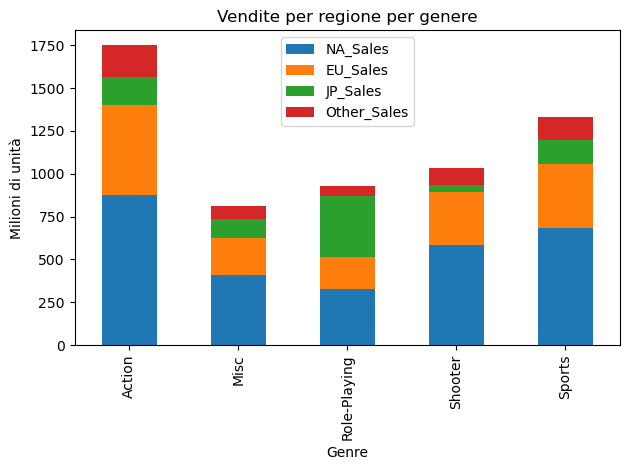


In [20]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [56]:
dff = df[((df.Genre == "Action") | (df.Genre == "Misc") | (df.Genre == "Role-Playing") | (df.Genre == "Shooter") | (df.Genre == "Sports"))]
dff = dff.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
dff.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,5.000000,5.000000,5.000000,5.000000
mean,576.260000,323.832000,158.734000,111.994000
std,219.092794,135.514868,117.395206,50.957276
min,327.280000,188.060000,38.280000,59.610000
25%,410.240000,215.980000,107.760000,75.320000
50%,582.600000,313.270000,135.370000,102.690000
75%,683.350000,376.850000,159.950000,134.970000
max,877.830000,525.000000,352.310000,187.380000


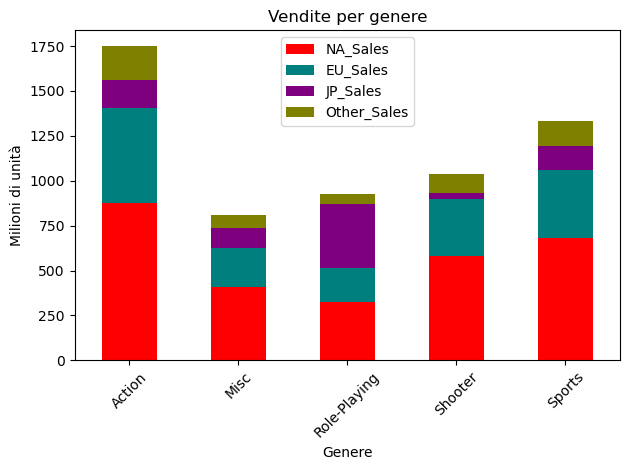

In [58]:
ax = dff.plot(kind='bar', stacked=True, color=["#FF0000", "#007F7F", "#7F007F", "#7F7F00"])
plt.title("Vendite per genere")
plt.xlabel("Genere")
plt.ylabel("Milioni di unità")
plt.xticks(rotation=45)
plt.legend(title='', loc='upper center')
plt.tight_layout()
plt.show()
